In [1]:
# Import necessary libraries
import pandas as pd

# Load the data
data = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# Check for missing values
data.isnull().sum()

# Display basic statistics of the dataset
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


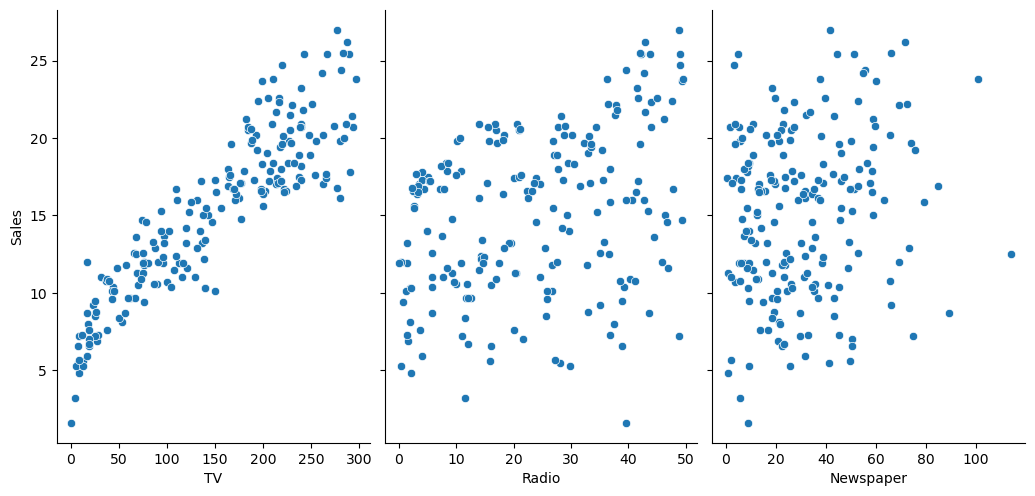

In [3]:
# Visualize the relationships between features and the target variable (Sales)
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='scatter')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Define the feature columns and the target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')


MAE: 1.274826210954934
MSE: 2.907756910271091
R-squared: 0.9059011844150826


In [7]:
# Example of making predictions
new_data = pd.DataFrame({
    'TV': [100, 150],
    'Radio': [20, 30],
    'Newspaper': [10, 15]
})

# Predict sales
predictions = model.predict(new_data)
print(predictions)


[12.2273272 15.9839276]


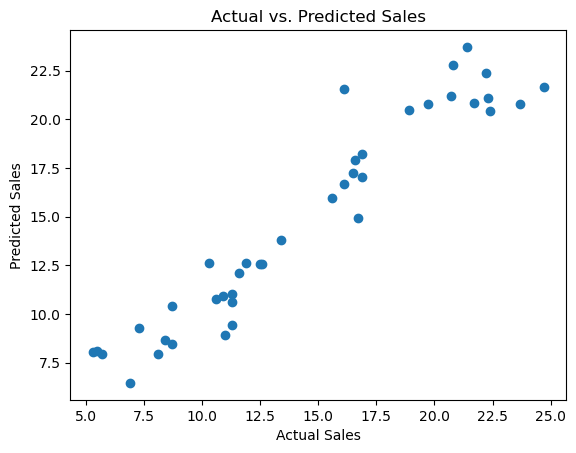

In [8]:
# Plot actual vs. predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()
